# Machine learning

## EXERCISE: Simple linear regression from scratch

[Adapted from Data Science from Scratch, Ch. 14.]

For this exercise, we'll build simple linear regression from scratch following the text book.

We'll use the data from the book's imaginary social network (DataSciencester):

* `num_friends` is the friend count for each user.
* `daily_minutes` is the average time spend per day on the site for each user.

In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

### Preliminary maths functions

First we'll define some linear algebra and stats functions (from Ch. 4&5).

In [2]:
import math

####
#
# LINEAR ALGEBRA
#
####

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

####
#
# STATS
#
####

def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

####
#
# CORRELATION
#
#####

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

### TODO Compare to numpy/scipy

- Compare our functions above to the `mean`, `var` and `std` functions from `numpy`. Are the results effectively the same?
- Compare the correlation above to the `pearsonr` function from `scipy.stats`. Are the results effectively the same?

In [3]:
# 1 - Mostly the same with some small tolerable differences.
import numpy as np
print('\nComparing stats for number of friends:')
print('-'*47)
print('{:15} {:>15} {:>15}'.format('Statistic', 'From Numpy', 'From Scratch'))
print('-'*47)
for np_fn, sc_fn in [(np.mean, mean), (np.var, variance), (np.std, standard_deviation)]:
    print('{:15} {:15.2f} {:15.2f}'.format(np_fn.__name__, np_fn(num_friends), sc_fn(num_friends)))
print('-'*47)

# 2 - 
from scipy.stats import pearsonr
print('\nCorrelation from scipy: {:.3f}'.format(pearsonr(num_friends, daily_minutes)[0]))
print('Correlation from scratch: {:.3f}'.format(correlation(num_friends, daily_minutes)))



Comparing stats for number of friends:
-----------------------------------------------
Statistic            From Numpy    From Scratch
-----------------------------------------------
mean                       7.33            7.33
var                       81.14           81.54
std                        9.01            9.03
-----------------------------------------------

Correlation from scipy: 0.247
Correlation from scratch: 0.247


### Removing outliers

Let's have a look at the data.

The data point for somebody who has 100 friends but spends 1 minute per day looks like an outlier. Let's remove it (see pages 64-65 of the text book for a discussion).

This leads to much stronger correlation.


Scatter plot for daily minutes vs number of friends:


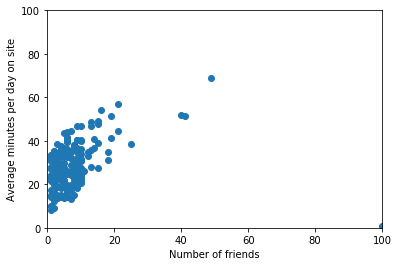

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print('\nScatter plot for daily minutes vs number of friends:')
_ = plt.scatter(num_friends, daily_minutes)
_ = plt.xlim(0,100)
_ = plt.ylim(0,100)
_ = plt.xlabel('Number of friends')
_ = plt.ylabel('Average minutes per day on site')

outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [5]:
print('Correlation before outlier removal: {:.3f}'.format(correlation(num_friends, daily_minutes)))
print('Correlation after outlier removal: {:.3f}'.format(correlation(num_friends_good, daily_minutes_good)))

Correlation before outlier removal: 0.247
Correlation after outlier removal: 0.574


### Simple linear regression

That's the preliminaries all done. Now we can look at linear regression between two variables.

Let's assume that we think having more friends causes people to spend more time on the site (see pages 65-67 of the book for a good discussion of caveats and other possible explanations).

We're now going to build a simple linear model to describe this relationship.

In particular, we assume a model of the form:

`y_i = beta * x_i + alpha`

Note this takes us right back to [linear equations in algebra](https://en.wikipedia.org/wiki/Linear_equation):

`y = mx + b`

Looking back at the scatter plot and correlation, this doesn't seems plausible if we assume some noise.

Let's see how this works for our data.

In [7]:
def predict(alpha, beta, x_i):
    """the linear model
    alpha and beta are our model parameters
    x_i is the data point
    return the predicted y value for x_i"""
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    """the difference between the true y_i
    and our predicted y value"""
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print("alpha", alpha)
print("beta", beta)

r_squared_value = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
print("r-squared", r_squared_value)

alpha 22.94755241346903
beta 0.903865945605865
r-squared 0.3291078377836305


### TODO Assessing fit and precision

R-squared gives an indication of [how well the model fits our data](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit). It ranges from 0 to 1, with higher values indicating a better fit.

Standard error is defined as [the square root of the sum of squared errors divided by N](http://onlinestatbook.com/2/regression/accuracy.html). 

As a [rule of thumb](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), we can calculate a 95% confidence interval as [+/- 2 * standard_error from the regression line](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-s-the-standard-error-of-the-regression).

- What r-squared for our model above? Does this indicate a good fit?
- Define a `standard_error` function using `sum_of_squared_errors` and `math.sqrt`. What is the standard error of our model?
- Redraw the scatterplot from above. This time use `plt.plot` to overlay the regression line and the 95% prediction interval at + and - 2 times the calculated standard error.
- Suppose our requirement is that predictions should be +/- 10 minutes of the actual value. Can we say this is with 95% confidence?

standard error 8.062752435241086

Scatter plot with regression line and 95% prediction interval:


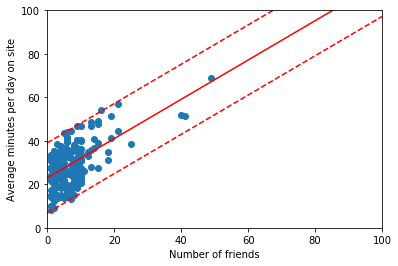

In [8]:
# 1 - The value here is 0.329. This suggests that our model only partly explains the data
#     so there must be other factors at play (see page 176 of the text book).


# 2 - 
def standard_error(alpha, beta, x, y):
    return math.sqrt(sum_of_squared_errors(alpha, beta, x, y) / len(y))

stderr = standard_error(alpha, beta, num_friends_good, daily_minutes_good)
print("standard error", stderr)

# 3 - 
print('\nScatter plot with regression line and 95% prediction interval:')
_ = plt.scatter(num_friends_good, daily_minutes_good)
_ = plt.xlim(0,100)
_ = plt.ylim(0,100)
_ = plt.xlabel('Number of friends')
_ = plt.ylabel('Average minutes per day on site')
_ = plt.plot([0,100], [predict(alpha,beta,0), predict(alpha,beta,100)], 'r',
             [0,100], [predict(alpha,beta,0)-2*stderr, predict(alpha,beta,100)-2*stderr], 'r--',
             [0,100], [predict(alpha,beta,0)+2*stderr, predict(alpha,beta,100)+2*stderr], 'r--')

# 4 - Nope. The standard error is ~8. 2 * 8 > 10.

### TODO Compare to scipy

- Compare our result to the `linregress` function from `scipy.stats`. Are alpha, beta and r-squared the same?
- The `scipy` implementation also returns a p-value for the H0 that slope is 0. What is the p-value? Can we reject the H0 at p<=0.01?

Note the scipy implementation returns a standard error, but it the error for the slope coefficient instead of the fitting error.

In [9]:
# 1 - 
from scipy.stats import linregress
slope, intercept, r_value, p_value, slope_stderr = linregress(num_friends_good, daily_minutes_good)

print('\nComparing linear regression values:')
print('-'*47)
print('{:15} {:>15} {:>15}'.format('Statistic', 'From Scipy', 'From Scratch'))
print('-'*47)
for name, sc_val, sp_val in [("alpha", intercept, alpha),
                             ("beta", slope, beta),
                             ("r-squared", r_squared_value, r_value**2)]:
    print('{:15} {:15.2f} {:15.2f}'.format(name, sc_val, sp_val))
print('-'*47)

# 2 - 
print('\np-value for a two-sided test of H0 that slope is 0: {}'.format(p_value))
print('Can we reject H0?', 'Yes' if p_value<=0.01 else 'No')


Comparing linear regression values:
-----------------------------------------------
Statistic            From Scipy    From Scratch
-----------------------------------------------
alpha                     22.95           22.95
beta                       0.90            0.90
r-squared                  0.33            0.33
-----------------------------------------------

p-value for a two-sided test of H0 that slope is 0: 3.676825862770313e-19
Can we reject H0? Yes


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Multiple regression

[Adapted from http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/.]

Let's at the [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing). This contains information about housing values by suburb and related information.

### Loading and visualising data

Let's load the data and have a quick look at some descriptive stats for our features.

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Descriptive stats for feature values:
-----------------------------------------------------------------
Name              Min        Max       Mean      Stdev     Median
-----------------------------------------------------------------
CRIM             0.01      88.98       3.59       8.59       0.26
ZN               0.00     100.00      11.36      23.30       0.00
INDUS            0.46      27.74      11.14       6.85       9.69
CHAS             0.00       1.00       0.07       0.25       0.00
NOX              0.39       0.87       0.55       0.12       0.54
RM               3.56       8.78       6.28       0.70       6.21
AGE              2.90     100.00      68.57      28.12      77.50
DIS              1.13      12.13       3.80       2.10       3.21
RAD              1.00      24.00       9.55       8.70       5.00
TAX            187.00     711.00     408.24     168.37     330.00
PTRATIO         12.60      22.00      18.46       2.16      19.05
B                0.32     396.90     3

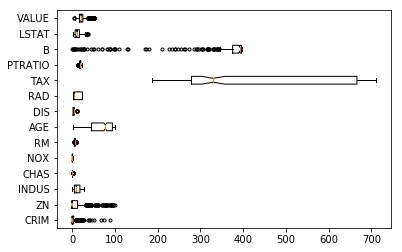

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(boston.data)
print('-'*65)
print('{:10} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*65)
for i, col in enumerate(cols):
    print('{:10} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(boston.feature_names[i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*65)
    
print('\nBoxplots of feature values:')
cols = cols_from_rows(boston.data) + [boston.target]
_ = plt.boxplot(cols, vert=False, notch=True, flierprops={'marker':'.'})
labels = list(boston.feature_names) + ['VALUE']
_ = plt.yticks(range(1,15), labels)

### Linear regression in scikit-learn

Now let's fit a linear model for predicting a suburbs median house value given the other features.

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

# Now let's fit a model
lm = LinearRegression()
_ = lm.fit(X_train, Y_train)

print('Intercept:', lm.intercept_)
print('Coefficients:\n', lm.coef_)
print('\nR-squared:', lm.score(X_train, Y_train))

# We use the score method to get r-squared
print('\nR-squared:', lm.score(X_train, Y_train))

# We can predict the median price for a new neighbourhoods
print('\nPredicted price of first five neighbourhoods from test split:\n', lm.predict(X_test)[:5])

# We use the score method to get r-squared
print('\nR-squared:', lm.score(X_train, Y_train))

# We can also calculate the standard error
stderr = math.sqrt(np.mean((Y_train - lm.predict(X_train))**2))
print('\nStandard error:', stderr)

Intercept: 32.8589326341
Coefficients:
 [ -1.56381297e-01   3.85490972e-02  -2.50629921e-02   7.86439684e-01
  -1.29469121e+01   4.00268857e+00  -1.16023395e-02  -1.36828811e+00
   3.41756915e-01  -1.35148823e-02  -9.88866034e-01   1.20588215e-02
  -4.72644280e-01]

R-squared: 0.755133274178

R-squared: 0.755133274178

Predicted price of first five neighbourhoods from test split:
 [ 37.46723562  31.39154701  27.1201962    6.46843347  33.62966737]

R-squared: 0.755133274178

Standard error: 4.421171617742821


/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### TODO Evaluating predictions 

- Does r_squared indicate a good fit?
- Use `mean_squared_error` from `sklearn.metrics` to calculate standard error. Compare this to the value we calculated in the previous cell.
- According to the 95% prediction interval, how close will our predictions be to the actual value? What if we calculate over the test data instead?

[Residual plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/) scatter residuals (y_true - y_predicted) on the y-axis versus predicted values on the x-axis. A residual plot indicates that a linear model is appropriate if the points are randomly distributed around the `y=0` line.

- Draw a residual plot with training data in blue and test data in green. Is a linear model appropriate for our data? Is prediction performance comparable to training performance?

Standard error: 4.421171617742821
Standard error using sklearn.metrics: 4.421171617742821

Predictions should be within 8.8k dollars at 95% confidence according to training data.
Predictions should be within 10.7k dollars at 95% confidence according to test data.

Residual plot for training data (blue) and test data (green):


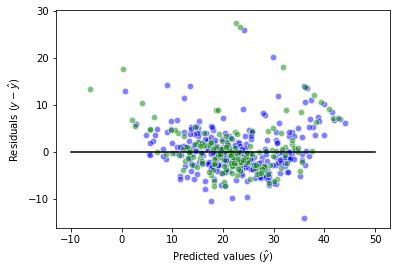

In [13]:
# 1 - Yes, r_squared indicates that our model explains the data reasonable well.
#     But we should look at standard error as well (page 183 of Data Science from Scratch).

# 2 - 
from sklearn.metrics import mean_squared_error
se1 = math.sqrt(np.mean((Y_train - lm.predict(X_train))**2))
print('Standard error:', se1)
se2 = math.sqrt(mean_squared_error(Y_train, lm.predict(X_train)))
print('Standard error using sklearn.metrics:', se2)

# 3 - Note we have a fairly small data set (339 in training, 167 in test).
#     So this value will vary depending on our split. 
print('\nPredictions should be within {:.1f}k dollars at 95% confidence according to training data.'.format(2*se2))
se_test = math.sqrt(mean_squared_error(Y_test, lm.predict(X_test)))
print('Predictions should be within {:.1f}k dollars at 95% confidence according to test data.'.format(2*se_test))

# 4 - Yes the linear model is appropriate
print('\nResidual plot for training data (blue) and test data (green):')
_ = plt.scatter(lm.predict(X_train), Y_train-lm.predict(X_train), c='blue', s=40, alpha=0.5, edgecolor='white')
_ = plt.scatter(lm.predict(X_test), Y_test-lm.predict(X_test), c='green', s=40, alpha=0.5, edgecolor='white')
_ = plt.plot([-10,50], [0,0], c='black')
_ = plt.ylabel('Residuals ($y - \hat{y}$)')
_ = plt.xlabel('Predicted values ($\hat{y}$)')

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Logistic regression

[Adapted from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html.]

We'll use the Iris data set. Like the digits data from week 7, this is another classic machine learning data set.

### Loading and visualising data

Let's load the data and have a quick look at some descriptive stats for our features.

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Descriptive stats for feature values:
---------------------------------------------------------------------------
Name                        Min        Max       Mean      Stdev     Median
---------------------------------------------------------------------------
sepal length (cm)          4.30       7.90       5.84       0.83       5.80
sepal width (cm)           2.00       4.40       3.05       0.43       3.00
petal length (cm)          1.00       6.90       3.76       1.76       4.35
petal width (cm)           0.10       2.50       1.20       0.76       1.30
---------------------------------------------------------------------------

Boxplots of feature values:


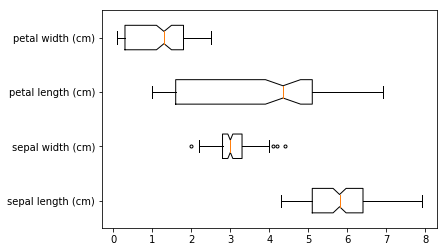

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(iris.data)
print('-'*75)
print('{:20} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*75)
for i, col in enumerate(cols):
    print('{:20} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(iris.feature_names[i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*75)
    
print('\nBoxplots of feature values:')
_ = plt.boxplot(cols_from_rows(iris.data), vert=False, notch=True, flierprops={'marker':'.'})
_ = plt.yticks(range(1,5), iris.feature_names)

### Logistic regression in scikit-learn

Now let's use logistic regression to learn a model of iris type given sepal and petal measurements.

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

# Now let's fit a model
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:5])
print('Actual type of first five organisms from test split:', Y_test[:5])

Intercept: [ 0.25397574  0.60069446 -0.93036609]
Coefficients:
 [[ 0.37224112  1.33112319 -2.04834173 -0.96176771]
 [ 0.51334978 -1.57472052  0.49303449 -1.26808117]
 [-1.62286014 -1.02340492  2.1130959   2.27391686]]

Predicted type of first five organisms from test split: [1 2 2 0 2]
Actual type of first five organisms from test split: [1 2 2 0 2]


### Evaluating classification

Recall from week 7 that `sklearn.metrics` includes various evaluation measures. 

In [17]:
from sklearn.metrics import classification_report
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

Classification report (0=setosa, 1=versicolor, 2=virginica):

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.82      0.90        17
          2       0.85      1.00      0.92        17

avg / total       0.95      0.94      0.94        50



Confusion matrix (0=setosa, 1=versicolor, 2=virginica):



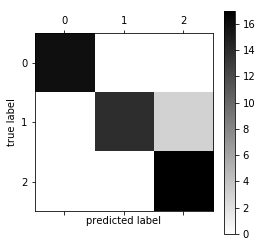

In [18]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion matrix ({}):\n'.format(key))
_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

### TODO Choose parameters using grid search

[Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html.]

- Choose the best C values in [1, 10, 100, 1000, 10000, 100000, 1000000] and the best penalty in ['l1', 'l2']
- Which is the best C? Which is the best penalty?
- How do precision, recall and f1 scores compare?

In [19]:
from sklearn.grid_search import GridSearchCV

# Perform grid search
param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
for params, mean_score, scores in logreg.grid_scores_:
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', logreg.best_params_)

print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Grid search mean and stdev:

0.930 (+/-0.125) for {'C': 1, 'penalty': 'l1'}
0.930 (+/-0.115) for {'C': 1, 'penalty': 'l2'}
0.950 (+/-0.029) for {'C': 10, 'penalty': 'l1'}
0.950 (+/-0.076) for {'C': 10, 'penalty': 'l2'}
0.960 (+/-0.029) for {'C': 100, 'penalty': 'l1'}
0.960 (+/-0.029) for {'C': 100, 'penalty': 'l2'}
0.960 (+/-0.029) for {'C': 1000, 'penalty': 'l1'}
0.970 (+/-0.001) for {'C': 1000, 'penalty': 'l2'}
0.960 (+/-0.029) for {'C': 10000.0, 'penalty': 'l1'}
0.970 (+/-0.001) for {'C': 10000.0, 'penalty': 'l2'}
0.960 (+/-0.029) for {'C': 100000.0, 'penalty': 'l1'}
0.980 (+/-0.029) for {'C': 100000.0, 'penalty': 'l2'}
0.960 (+/-0.029) for {'C': 1000000.0, 'penalty': 'l1'}
0.980 (+/-0.029) for {'C': 1000000.0, 'penalty': 'l2'}
0.960 (+/-0.029) for {'C': 10000000.0, 'penalty': 'l1'}
0.980 (+/-0.029) for {'C': 10000000.0, 'penalty': 'l2'}

Best parameters: {'C': 100000.0, 'penalty': 'l2'}

Classification report (0=setosa, 1=versicolor, 2=virginica):

             precision    recall 

## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Decision trees

[Adapted from http://scikit-learn.org/stable/modules/tree.html and http://thegrimmscientist.com/2014/10/23/tutorial-decision-trees/.]

Let's try a decision tree on the same data.

### Train and view a tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Let's fit a model
tree = DecisionTreeClassifier(max_depth=2)
_ = tree.fit(X_train, Y_train)

# Evaluate
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, tree.predict(X_test)))

Classification report (0=setosa, 1=versicolor, 2=virginica):

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.89      0.94      0.91        17
          2       0.94      0.88      0.91        17

avg / total       0.94      0.94      0.94        50



In [21]:
#From http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
def get_code(tree, feature_names, target_names, spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)
    
print('Decision tree:\n')
get_code(tree, iris.feature_names, iris.target_names)

Decision tree:

if ( petal width (cm) <= 0.699999988079 ) {
    return setosa ( 34 examples )
}
else {
    if ( petal width (cm) <= 1.75 ) {
        return versicolor ( 33 examples )
        return virginica ( 3 examples )
    }
    else {
        return virginica ( 30 examples )
    }
}


### McNemar's test

McNemar's test is [recommended when we have a single test split](http://sci2s.ugr.es/keel/pdf/algorithm/articulo/dietterich1998.pdf).

Under H0, the two algorithms should have the same error rate.

In [22]:
from scipy.stats import chi2

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

### TODO Compare classifiers

- Choose the decision tree max_depth in [2..6], criterion in ['entropy', 'gini'] and splitter in ['best', 'random']. What are the best parameters? Print out all grid scores to sanity check the selection. Is there a unique best set of parameters?
- Use `np.array` create `l_yn` and `t_yn` arrays showing respectively for logistic regression and decition tree whether each test instance is predicted correctly (`1`) or incorrectly (`0`). Are the classifiers significantly different at p<=0.05 according to McNemar's test?
- The simplest possible classifier always returns the majority class. Implement a majority baseline. Are our classifiers significantly better than this baseline at p<=0.05?

In [23]:
from sklearn.grid_search import GridSearchCV

# Perform grid search
param_grid = [
    {'max_depth': [2, 3, 4, 5, 6],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
for params, mean_score, scores in tree.grid_scores_:
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', tree.best_params_)

# Evaluate on held-out test
print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, tree.predict(X_test)))

Grid search mean and stdev:

0.960 (+/-0.029) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
0.770 (+/-0.124) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
0.960 (+/-0.029) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
0.940 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
0.950 (+/-0.058) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
0.880 (+/-0.132) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
0.950 (+/-0.058) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
0.940 (+/-0.086) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
0.930 (+/-0.076) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
0.940 (+/-0.086) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}
0.960 (+/-0.029) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
0.820 (+/-0.102) for {'criterion': 'gini', 'max_depth': 2, 'sp

In [24]:
# Calculate whether each test prediction is correct
l_yn = np.array([int(p==t) for p,t in zip(logreg.predict(X_test), Y_test)])
t_yn = np.array([int(p==t) for p,t in zip(tree.predict(X_test), Y_test)])

# There's very little difference in this data set
print(l_yn)
print(t_yn)

# We cannot reject H0. Accuracy is different but not reliably so.
# Therefore, we can select either classifier, e.g.,
# decision tree for interpretability.
print('\nCan we reject H0?', 'Yes' if mcnemar(l_yn, t_yn)[1]<0.05 else 'No')

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1]

Can we reject H0? No


In [26]:
# Create baseline predictions and evaluate
def predict_majority_class(x, majority_class=2):
    return [majority_class for _ in x]
b_preds = predict_majority_class(X_test)
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, b_preds))

# Are our classifiers significantly better than baseline?
b_yn = np.array([int(p==t) for p,t in zip(b_preds, Y_test)])
bl_pvalue = mcnemar(b_yn, l_yn)[1]
print('\nIs logisitic regression better than baseline?',
      'Yes (p={})'.format(bl_pvalue) if bl_pvalue<0.05 else 'No')
bt_pvalue = mcnemar(b_yn, t_yn)[1]
print('Is the decision tree better than baseline?',
      'Yes (p={})'.format(bt_pvalue) if bt_pvalue<0.05 else 'No')

Classification report (0=setosa, 1=versicolor, 2=virginica):

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.00      0.00      0.00        17
          2       0.34      1.00      0.51        17

avg / total       0.12      0.34      0.17        50


Is logisitic regression better than baseline? Yes (p=3.95885676595604e-07)
Is the decision tree better than baseline? Yes (p=7.722679550543405e-05)


/Users/carolchen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
